<a href="https://colab.research.google.com/github/jonatanriq/estudos_gerais/blob/main/mapa_batimetrico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Oceanografia

### Fazendo mapa de contorno batimétrico

Autor: **Jonatan Nascimento**

# Usando Meotodologia Antiga

In [3]:
# isso aqui evita ficar vendo várias msgs nessa janela
%%capture

# tudo isso aqui vamos usar. Demora um pouquinho para a máquina virtual criar tudo (~2 minutos). Tenha paciência
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely
!pip install geopandas
!pip install salem
!pip install rasterio
!pip install cmocean

Lembrando que nesse caso está em json!

In [125]:
# primeiramente, vamos importar os dados de linha de costa
import json
costa = json.load(open('/content/Limite_do_Munic%C3%ADpio_do_Rio_de_Janeiro.geojson'))

In [102]:
# agora, vamos importar os dados de batimetria
import pandas as pd
batimetria = pd.read_excel('/content/batimetria_interpolada.xlsx')

In [104]:
from pyproj import Proj # IMPORTANDO O PROJETOR 
#Definindo o datum de entrada e de saída para o projetor
myProj = Proj("+proj=utm +zone=23 +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs")  

#Passando a projeção em cima dos dados de batimetria e definindo as variáveis
lon, lat = myProj(batimetria['x'].values, batimetria['y'].values, inverse=True)

In [105]:
#Colocando as variáveis dentro do dataset
batimetria['lon'] = lon
batimetria['lat'] = lat

In [107]:
#Selecionando apenas os dados onde a profundidade é maior que -10 (tem dado indo até -300 (irreal))
batimetria = batimetria.loc[batimetria['z'] > -10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: ShapelyDeprecationWarning: The proxy geometries (through the 'asShape()', 'asMultiPolygon()' or 'MultiPolygonAdapter()' constructors) are deprecated and will be removed in Shapely 2.0. Use the 'shape()' function or the standard 'MultiPolygon()' constructor instead.
Exception ignored in: <function BaseGeometry.__del__ at 0x7fa5e6fb4b90>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/shapely/geometry/base.py", line 209, in __del__
  File "/usr/local/lib/python3.7/dist-packages/shapely/geometry/base.py", line 199, in _empty
  File "/usr/local/lib/python3.7/dist-packages/shapely/geometry/proxy.py", line 44, in __setattr__
AttributeError: can't set attribute


(-23.1, -22.96)

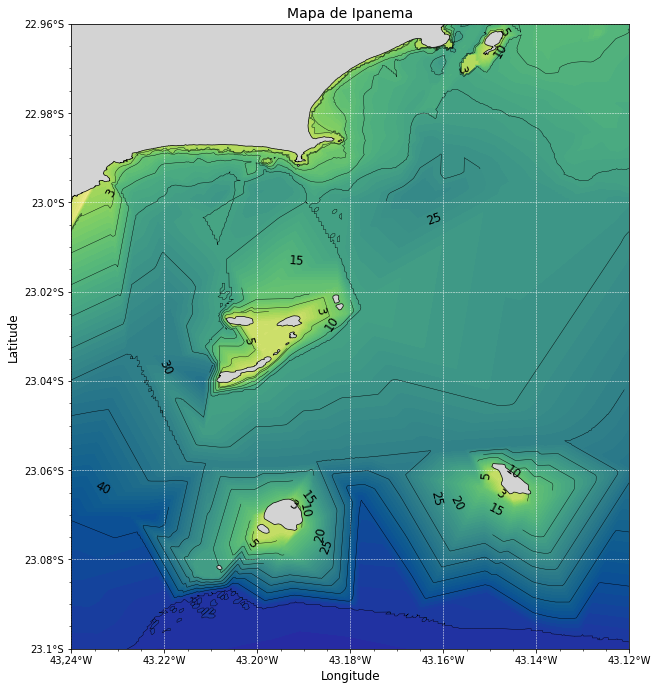

In [128]:
import matplotlib.pyplot as plt
import numpy as np  
import cmocean
import matplotlib as mpl
from shapely.geometry import asShape # manipulando geometria
from descartes import PolygonPatch 

fig = plt.figure(figsize=(10,11.5))
ax = fig.add_subplot(111)
ax.set_title('Mapa de Ipanema', fontsize=14)
ax.set_ylabel('Latitude',fontsize=12)
ax.set_xlabel('Longitude', fontsize=12)
plt.grid(linewidth=0.5, linestyle='--',color='white')
ax.set_yticks(np.arange(-23.10,-22.96,0.02))
ax.minorticks_on()
ax.set_yticklabels(['23.1°S' , '23.08°S', '23.06°S', '23.04°S', '23.02°S', '23.0°S'  , '22.98°S', '22.96°S']) # posso usar um for loop
ax.set_xticklabels(['43,24°W','43.22°W', '43.20°W' , '43.18°W', '43.16°W', '43.14°W', '43.12°W'])

for feat in costa["features"]:
    # convertendo a geometria p/ shapely
    geom = asShape(feat["geometry"])
    ax.add_patch(PolygonPatch(feat["geometry"], fc='lightgrey', ec='black',
                alpha=1, lw=0.7, ls='-', zorder=2))

cmap = cmocean.cm.haline_r #Cor do mapa invertida (colocar '_r')
levels = (np.arange(-10,60,1)) #Definindo os intervalos de cores
linhas = (3,5,10,15,20,25,30,35,40,45,50,55,60,65,70,80,90) #Definindo os intervalos de linhas de contorno
#norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both') #Normalização

# Criando mapa de contorno por três variáveis - contourf preenche
contorno = plt.tricontourf(batimetria['lon'],batimetria['lat'],batimetria['z'], cmap=cmap,levels=levels)

#Criando mapa de linhas de contorno por três variáveis
contorno_linhas = plt.tricontour(batimetria['lon'],batimetria['lat'],batimetria['z'], colors='k',
                                 levels=linhas,linestyles='-',linewidths=0.4)
plt.clabel(contorno_linhas,linhas,fmt='%1.0f',fontsize=12)

plt.xlim(-43.24, -43.12) # 0.12 <- essa distância deve ser igual a proporção da figura
plt.ylim(-23.1, -22.96)

# Usando ProPlot

## Instalando o pacote

In [130]:
%%capture
# ** exclusive to COLAB
# That was the ultimate "cake recipe" which worked after all. Note that it updates machine packages first
!grep '^deb ' /etc/apt/sources.list | \
  sed 's/^deb /deb-src /g' | \
  tee /etc/apt/sources.list.d/deb-src.list
!apt-get update

# then install cartopy and remove shapely (which doesn't talk to cartopy in collab)
!apt-get -qq build-dep python3-cartopy
!apt-get -qq remove python-shapely python3-shapely
# and finally reinstall shapely and cartopy in the required version
!pip install --no-binary shapely shapely --force

!pip install --no-binary cartopy cartopy==0.17.0
# finally, install the proplot
!pip install proplot

In [155]:
# primeiramente, vamos importar os dados de linha de costa
import json
costa = json.load(open('/content/Limite_do_Munic%C3%ADpio_do_Rio_de_Janeiro.geojson'))

In [ ]:
# agora, vamos importar os dados de batimetria
import pandas as pd
batimetria = pd.read_excel('/content/batimetria_interpolada.xlsx')

# Projeando os dados 
from pyproj import Proj # IMPORTANDO O PROJETOR 
#Definindo o datum de entrada e de saída para o projetor
myProj = Proj("+proj=utm +zone=23 +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs")  

#Passando a projeção em cima dos dados de batimetria e definindo as variáveis
lon, lat = myProj(batimetria['x'].values, batimetria['y'].values, inverse=True)

#Colocando as variáveis dentro do dataset
batimetria['lon'] = lon
batimetria['lat'] = lat

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:224: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  return cartopy.trace.project_linear(geometry, src_crs, self)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: ShapelyDeprecationWarning: The proxy geometries (through the 'asShape()', 'asMultiPolygon()' or 'MultiPolygonAdapter()' constructors) are deprecated and will be removed in Shapely 2.0. Use the 'shape()' function or the standard 'MultiPolygon()' constructor instead.
  del sys.path[0]
Exception ignored in: <function BaseGeometry.__del__ at 0x7fa5e6fb4b90>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/shapely/geometry/base.py", line 209, in __del__
  File "/usr/local/lib/python3.7/dist-packages/shapely/geometry/base.py", line 199, in _empty
  File "/usr/local/lib/python3.7/dist-packages/shapely/geometry/proxy.py", line 44, in __setattr_

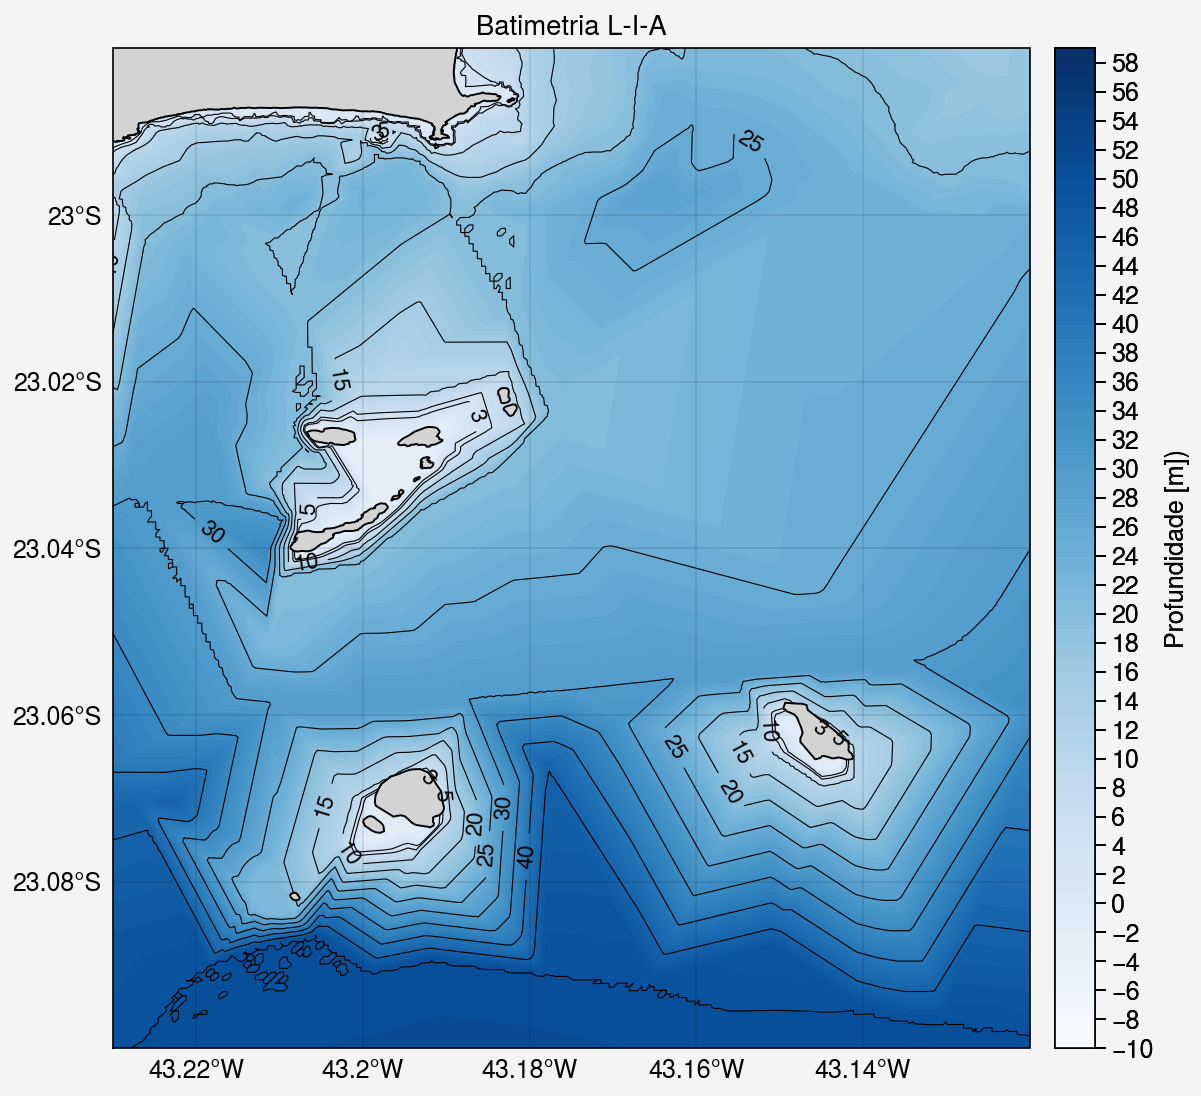

In [180]:
import proplot as plot
from shapely.geometry import asShape # manipulando geometria
from descartes import PolygonPatch 

levels = (np.arange(-10,60,1)) #Definindo os intervalos de cores
linhas = (3,5,10,15,20,25,30,35,40,45,50,55,60,65,70,80,90) #Definindo os intervalos de linhas de contorno

fig, ax = plot.subplots(axheight=5, tight=True,proj='pcarree',)
ax.format(coast=False, borders=False, innerborders=False, labels=True, latlines=0.02, lonlines=0.02, latlim=(-22.98,-23.1), lonlim=(-43.12,-43.23),title='Batimetria L-I-A')

for feat in costa["features"]:
    # convertendo a geometria p/ shapely
    geom = asShape(feat["geometry"])
    ax.add_patch(PolygonPatch(feat["geometry"], fc='lightgrey', ec='black',alpha=1, lw=0.7, ls='-', zorder=2))

map1 = ax.tricontourf(batimetria['lon'], batimetria['lat'], batimetria['z'], cmap='blues', levels=levels)
map2 = ax.tricontour(batimetria['lon'], batimetria['lat'], batimetria['z'],colors='k',
                     levels=linhas,linestyles='-',linewidths=0.4)
plt.clabel(map2,linhas,fmt='%1.0f',fontsize=8)
fig.colorbar(map1, loc='r', label='Profundidade [m])') # posso editar os ticks da colorbar
plot.show()